# Explore here


In [2]:
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup



In [58]:
# url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
# html_data = requests.get(url, time.sleep(10))

### Find Tables, Convert to DataFrame, Clean the DF

In [3]:
soup = BeautifulSoup(open('/workspaces/gustavolima-web-scraping-project-tutorial/src/list.html'), "html")
tables = soup.find_all("table")

# Convert the table element to a string
table_html = str(tables)

# Read the HTML content using pandas
tesla_revenue = pd.read_html(table_html)[0]

# Remove the "Unnamed" column if present
tesla_revenue = tesla_revenue.loc[:, ~tesla_revenue.columns.str.startswith('Unnamed')]

# Rename the columns
tesla_revenue = tesla_revenue.rename(columns={"Tesla Quarterly Revenue(Millions of US $)": "Date", "Tesla Quarterly Revenue(Millions of US $).1": "Revenue"})
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace(",", '').replace('$', '')

# Drop rows with NaN values
tesla_revenue = tesla_revenue.dropna()

# Display
print(tesla_revenue)

          Date  Revenue
0   2022-03-31    18756
1   2021-12-31    17719
2   2021-09-30    13757
3   2021-06-30    11958
4   2021-03-31    10389
5   2020-12-31    10744
6   2020-09-30     8771
7   2020-06-30     6036
8   2020-03-31     5985
9   2019-12-31     7384
10  2019-09-30     6303
11  2019-06-30     6350
12  2019-03-31     4541
13  2018-12-31     7226
14  2018-09-30     6824
15  2018-06-30     4002
16  2018-03-31     3409
17  2017-12-31     3288
18  2017-09-30     2985
19  2017-06-30     2790
20  2017-03-31     2696
21  2016-12-31     2285
22  2016-09-30     2298
23  2016-06-30     1270
24  2016-03-31     1147
25  2015-12-31     1214
26  2015-09-30      937
27  2015-06-30      955
28  2015-03-31      940
29  2014-12-31      957
30  2014-09-30      852
31  2014-06-30      769
32  2014-03-31      621
33  2013-12-31      615
34  2013-09-30      431
35  2013-06-30      405
36  2013-03-31      562
37  2012-12-31      306
38  2012-09-30       50
39  2012-06-30       27
40  2012-03-31  

### Check the Data Types to be able to create a SQL DB

In [4]:
type(tesla_revenue)

tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(str)
tesla_revenue.dtypes

Date       object
Revenue    object
dtype: object

### Transform the DF into a Tuples List for SQL

In [5]:
import sqlite3

records = tesla_revenue.to_records(index=False)
datatuples = list(records)
datatuples

[('2022-03-31', '18756'),
 ('2021-12-31', '17719'),
 ('2021-09-30', '13757'),
 ('2021-06-30', '11958'),
 ('2021-03-31', '10389'),
 ('2020-12-31', '10744'),
 ('2020-09-30', '8771'),
 ('2020-06-30', '6036'),
 ('2020-03-31', '5985'),
 ('2019-12-31', '7384'),
 ('2019-09-30', '6303'),
 ('2019-06-30', '6350'),
 ('2019-03-31', '4541'),
 ('2018-12-31', '7226'),
 ('2018-09-30', '6824'),
 ('2018-06-30', '4002'),
 ('2018-03-31', '3409'),
 ('2017-12-31', '3288'),
 ('2017-09-30', '2985'),
 ('2017-06-30', '2790'),
 ('2017-03-31', '2696'),
 ('2016-12-31', '2285'),
 ('2016-09-30', '2298'),
 ('2016-06-30', '1270'),
 ('2016-03-31', '1147'),
 ('2015-12-31', '1214'),
 ('2015-09-30', '937'),
 ('2015-06-30', '955'),
 ('2015-03-31', '940'),
 ('2014-12-31', '957'),
 ('2014-09-30', '852'),
 ('2014-06-30', '769'),
 ('2014-03-31', '621'),
 ('2013-12-31', '615'),
 ('2013-09-30', '431'),
 ('2013-06-30', '405'),
 ('2013-03-31', '562'),
 ('2012-12-31', '306'),
 ('2012-09-30', '50'),
 ('2012-06-30', '27'),
 ('2012-03

### Connect to SQL, Create a new .db and create a Table for the Data

In [6]:
con = sqlite3.connect('Tesla.db')

cur = con.cursor()

cur.execute("CREATE TABLE IF NOT EXISTS Tesla (Date, Revenue)")

cur.executemany("INSERT INTO Tesla VALUES (?, ?)", datatuples)

con.commit()



### Retrieve Data from the Table


In [7]:
for row in cur.execute('SELECT * FROM Tesla'):
    print(row)

('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')
('2014-03-31', '621')
('2013-12-31', '615')
('2013-09-30', '431')
('2013-06-30', '405')
('2013-03-31', '562')
('2012-12-31', '306')
('2012-09-30', '50')
('2012-06-30', '27')
('2012-03-31', '30')
('2011-12-31', '39')
('2011-09-30', '58')
('2011-06-30', '58')
('2011

### Plot a graphic

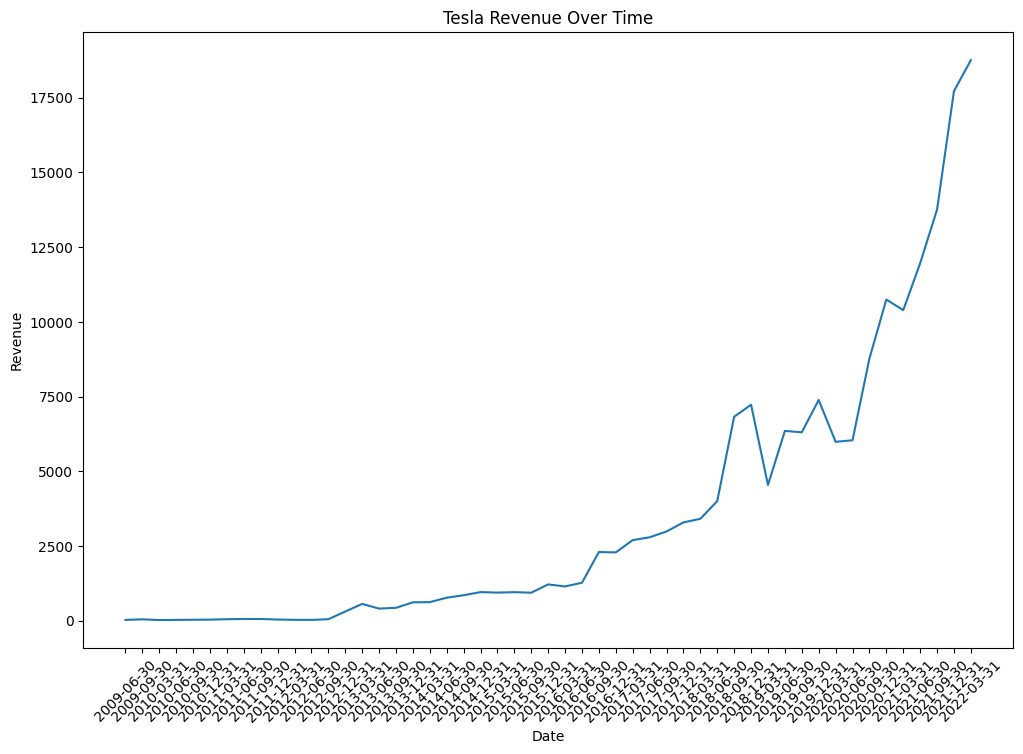

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the Data 
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(int)

# Create the plot using Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=tesla_revenue, x='Date', y='Revenue')

# Set the plot title and labels
plt.title('Tesla Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')

# Reverse the order of the x-axis
plt.gca().invert_xaxis()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()